Let’s build a step-by-step XGBoost model for the Loan Approval dataset.
Xgboost Classifier- its a more advanced and faster version of gradient boosting

In [2]:
#Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import xgboost as xgb

In [4]:
#Load Dataset
data = pd.read_csv("D:\Harshini\loan_approval_200.csv")

#Quick look
print(data.head())
print(data.info())


   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             8770               1663         440               120   
1             2360               9721         362               240   
2             6890               5592          85               300   
3            14918               7392         222               180   
4             6691               1306          69               120   

   Credit_History  Gender Married     Education Self_Employed Property_Area  \
0               1  Female     Yes  Not Graduate            No         Rural   
1               1    Male     Yes      Graduate            No     Semiurban   
2               1  Female     Yes  Not Graduate            No         Urban   
3               1  Female      No  Not Graduate            No         Urban   
4               1  Female      No      Graduate            No         Urban   

   Loan_Status  
0            0  
1            1  
2            1  
3            1  
4            

In [5]:
#Encode categorical variables
#columns to encode
categorical_cols = ['Gender',	'Married',	'Education',	'Self_Employed',	'Property_Area']

#initialize LabelEncoder
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

In [6]:
#Define features and target
X =  data.drop('Loan_Status',axis = 1)
y = data['Loan_Status']

In [8]:
#split into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42, stratify = y)

In [12]:
#Train XGBoost Classifier
#intialize model
model = xgb.XGBClassifier(
    objective='binary:logistic',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42)
#train model
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [14]:
#make predictions
y_pred = model.predict(X_test)

In [15]:
#evaluate model
#accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

#confusion matrix
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n", cm)

#classification report
cr = classification_report(y_test,y_pred)
print("Classification Report:\n", cr)

Accuracy: 0.625
Confusion Matrix:
 [[ 3 10]
 [ 5 22]]
Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.23      0.29        13
           1       0.69      0.81      0.75        27

    accuracy                           0.62        40
   macro avg       0.53      0.52      0.52        40
weighted avg       0.59      0.62      0.60        40



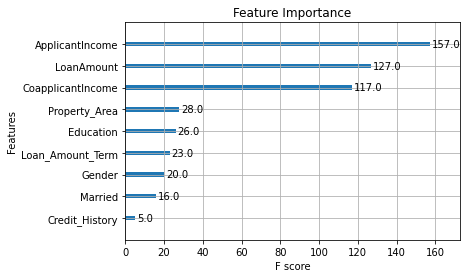

In [17]:
#feature importance
xgb.plot_importance(model)
plt.title("Feature Importance")
plt.show()

Business Insights

Credit History and ApplicantIncome are likely the most important features.

Customers with good credit history and higher income are more likely to get their loan approved.

The model can help pre-approve loans quickly and flag risky applicants.